# Housing Data Dive Mid-Term
## Submitted by William Bowman

* Submission Deadline: Friday, October 15, 2021 at 5 pm.

# DATA 3550_Fall 2021-Midterm Project  Submission Guidelines

## Formatting Guidelines

It is very important that your Jupyter Notebook is formatted correctly with markdown, comments, and code that works.
Please do the following for each section

* Include a title as a Heading 2
* Include a brief summary of the section
* Include your code and make sure it is executable and correct, include comments with the code.
* At the end of the section, include a brief summary of the results.

## How to turn it in:

*  Your Jupyter notebook file must be named Data3550MidPro_LastnameFirstInitial.ipynb. For example: the file name will be Data3550MidPro_RimalR.ipynb if I submit the Midterm Project.
* You are to turn in your Jupyter notebook file only. No data files and no folders.
* It is assumed that you created your Jupyter notebook in a folder named Data3550MidPro_student and in that folder is a Dataset folder. It is expected the path for importing a file is looking for a data folder, for example ‘Dataset/DF_AH.csv’.

### 1. Import required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import RidgeCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

pd.set_option('display.max_columns',200) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### 2. Import  the dataset DF_AH.csv
* The dataset DF_AH.csv is exported from the data data preprocessing notebook after we removed the outliars, and doing some feature engineering. This dataset contains 92 variables including the target variable.

In [2]:
df_ah = pd.read_csv(r'C:\Users\willi\OneDrive\Desktop\3550 Homework\Dataset\Dataset\DF_AH.csv')

In [3]:
df_ah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual  

## Perform additional Feature Engineering

## In this section I will create new features through dummy variables and by removing various features that are determined to be less impactful within the dataset.

In [4]:
df_ah['Foundation'].unique() # This gathers all the unique observations so we can determine if the feature is catagorical

array(['CBlock', 'PConc', 'Wood', 'BrkTil', 'Slab', 'Stone'], dtype=object)

In [5]:
df_ah['Neighborhood'].unique() # This gathers all the unique observations so we can determine if the feature is catagorical

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [6]:
df_ah['Foundation'].value_counts() # This returns a count of the unique values in the feature

PConc     1305
CBlock    1244
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [7]:
df_ah['Neighborhood'].value_counts()# This returns a count of the unique values in the feature

NAmes      443
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    107
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [8]:
# Dummy variables for Foundation
dummies_type = pd.get_dummies(df_ah['Foundation'], drop_first = False)
df_ah = pd.concat([df_ah, dummies_type], axis = 1)
df_ah.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,BrkTil,CBlock,PConc,Slab,Stone,Wood
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1,0,1,0,0,0,0
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1,0,1,0,0,0,0
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1,0,1,0,0,0,0
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1,0,1,0,0,0,0
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1,0,0,1,0,0,0


In [9]:
#Dummy Neighborhoods
dummies_type = pd.get_dummies(df_ah['Neighborhood'], drop_first = False)
df_ah = pd.concat([df_ah, dummies_type], axis = 1)
df_ah.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,BrkTil,CBlock,PConc,Slab,Stone,Wood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df_ah.isnull().sum() # USELESS

PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
Lot Area        0
               ..
SawyerW         0
Somerst         0
StoneBr         0
Timber          0
Veenker         0
Length: 126, dtype: int64

In [11]:
import missingno as msno

<AxesSubplot:>

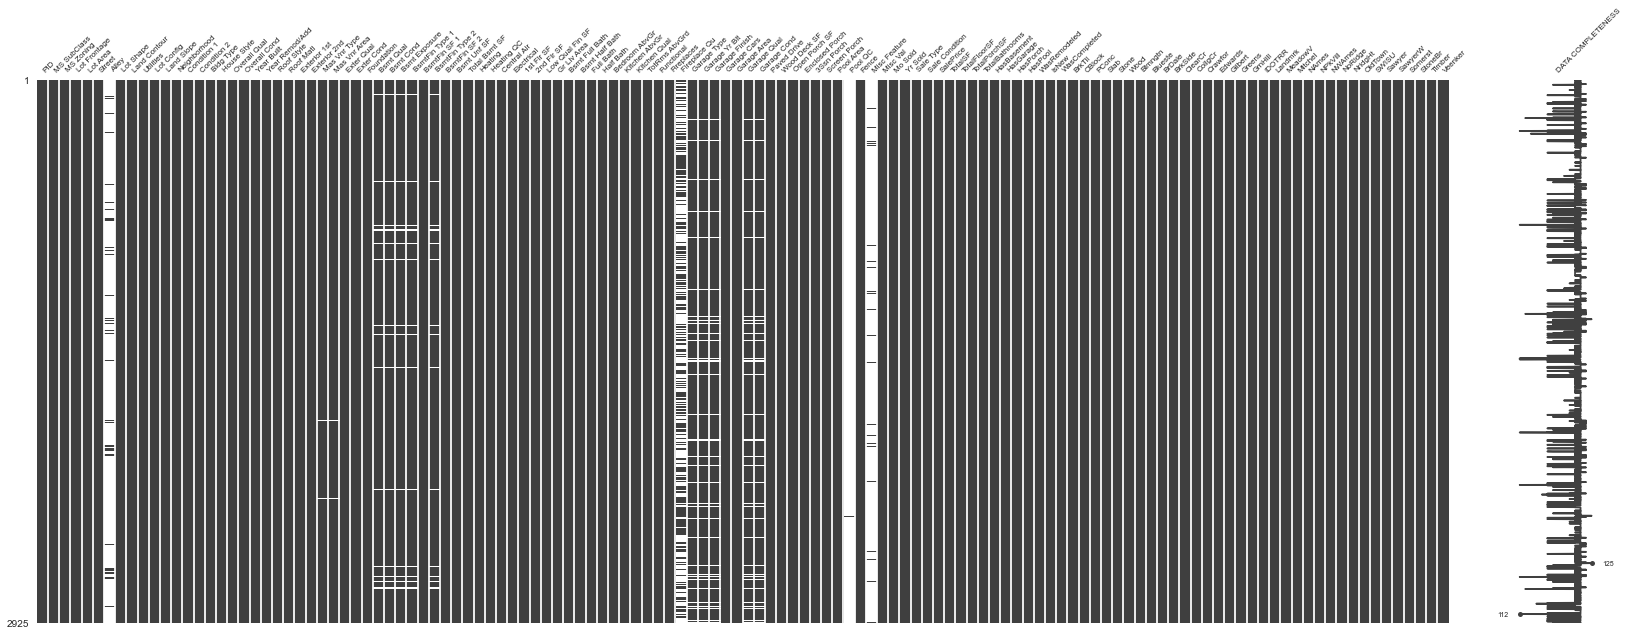

In [12]:
msno.matrix(df_ah, labels = True, fontsize = 8)
#Matrix of all missing values

<AxesSubplot:>

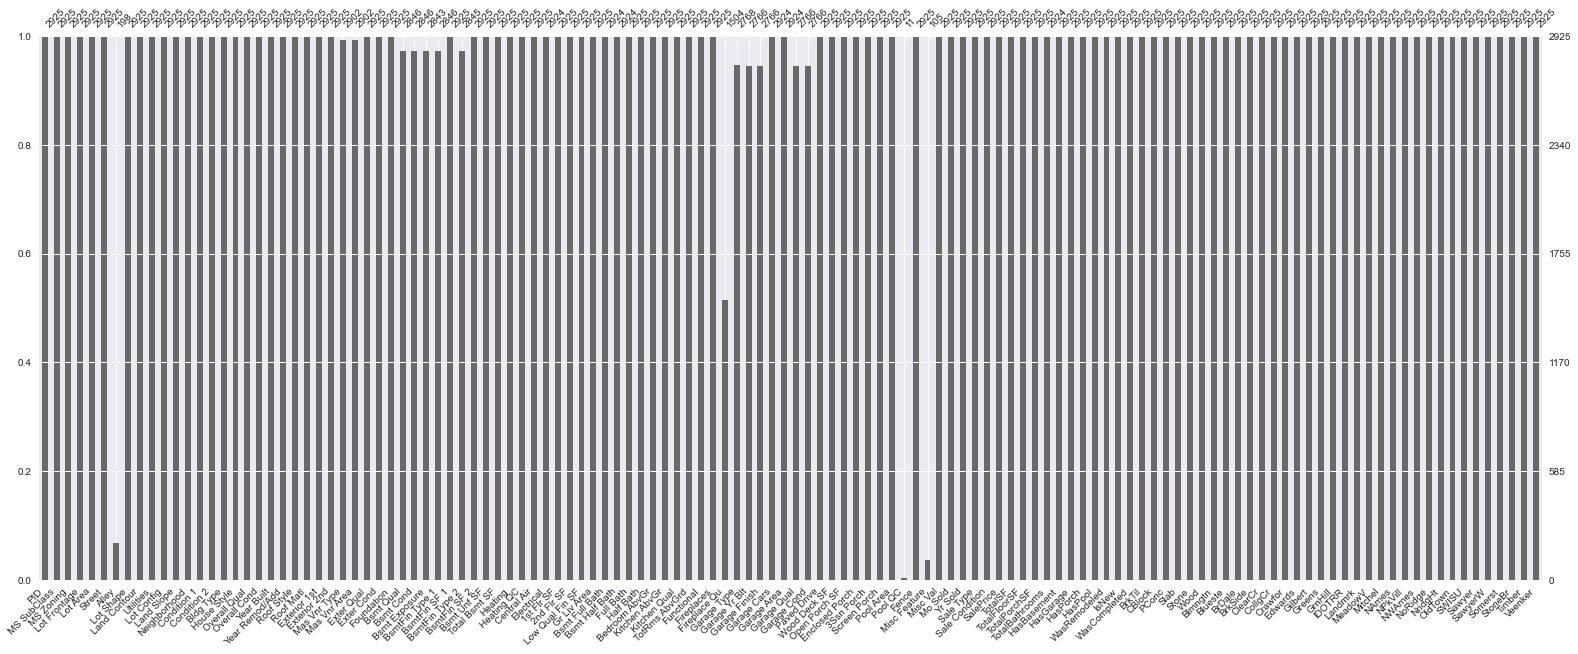

In [13]:
# Bargraphs for alternate visualization and counts. (Zoom if needed.)
msno.bar(df_ah, labels = True, fontsize = 10)

In [14]:
df_ah = df_ah.dropna(thresh=2500, axis = 1) # Kill all that have less than 2500 observations

<AxesSubplot:>

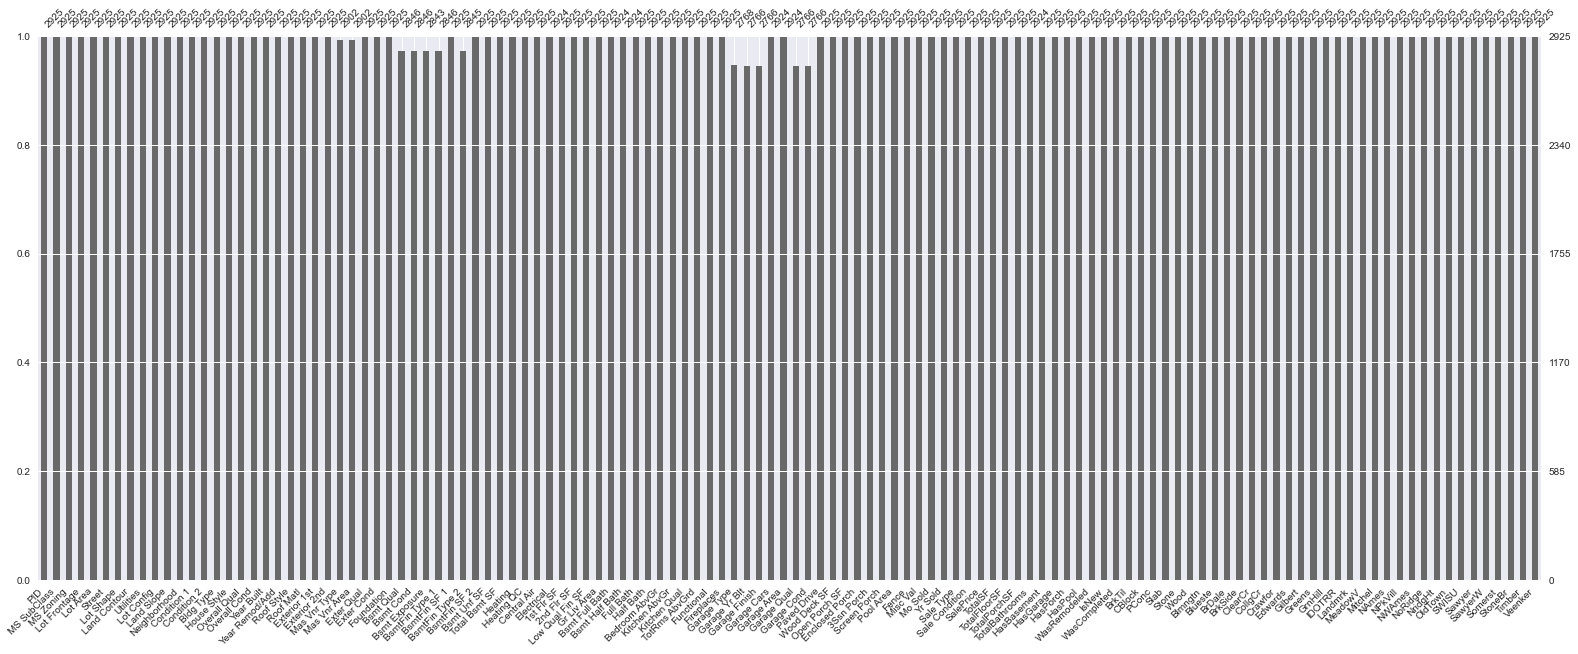

In [15]:
msno.bar(df_ah, labels = True, fontsize = 10) # Bargraph confirming the Genocide of our features

1) Identify the unique number of foundation types - .unique() Generated

2) Create the dummy variable for the foundation type -  Created

3) Identify the all the unique neighbourhood - .unique() Generated

4) Create the dummy variable for the neighbourhood - Created

5) Look at the DF_AH.info() and drop all the variables that have Non-Null count less than 2500.
   
   - MSNO Graphs Generated and dropped via Threshold parameter


<AxesSubplot:>

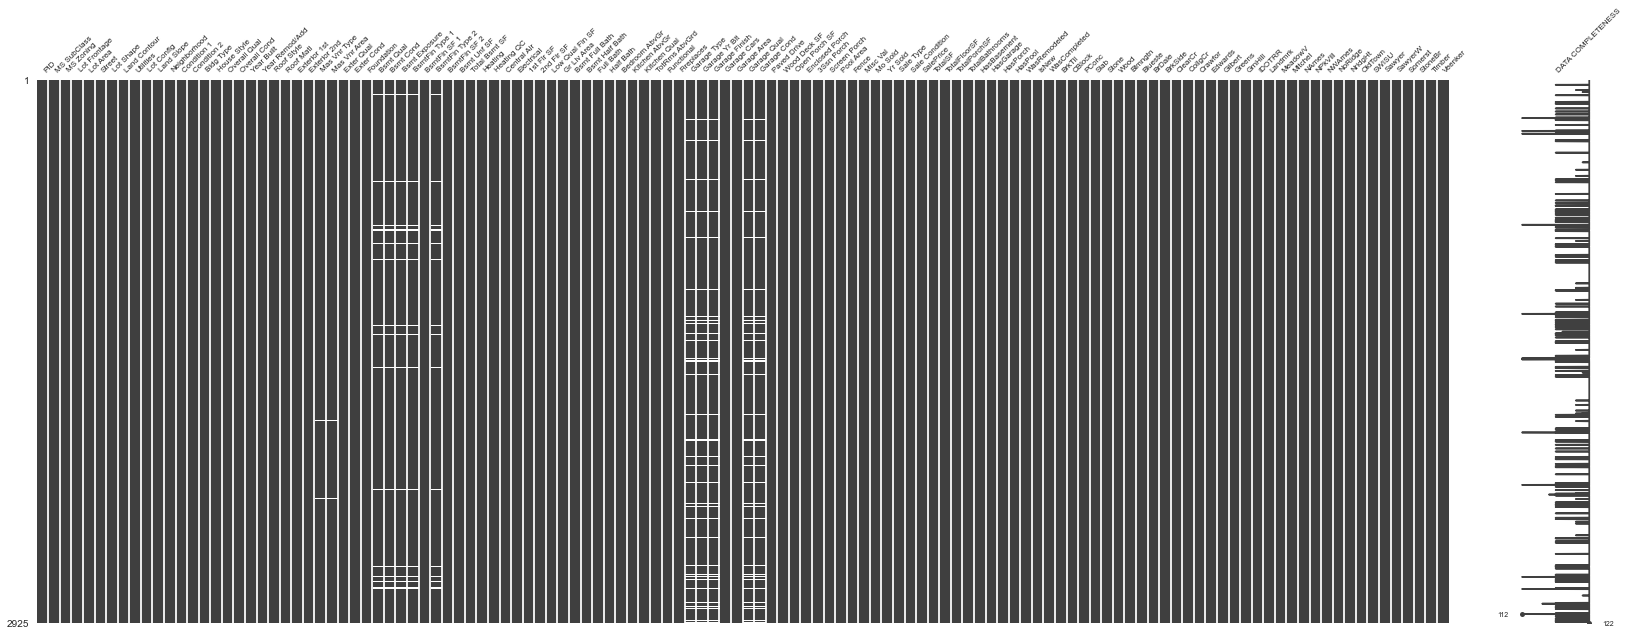

In [16]:
# Using Matrix to see if Data is missing at Random which overall does NOT appear to be random
msno.matrix(df_ah, labels = True, fontsize = 8) 

In [17]:
df_ah.sample(20)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,BrkTil,CBlock,PConc,Slab,Stone,Wood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
2750,906382040,20,RL,73.0,8990,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,1498.0,1498.0,GasA,Ex,Y,SBrkr,1498,0,0,1498,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,2006.0,RFn,2.0,675.0,TA,TA,Y,351,33,0,0,0,0,No,0,4,2006,New,Partial,204900,2996.0,1498,33,2.0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1117,528431120,60,RL,73.0,9801,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,156.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1341.0,1341.0,GasA,Ex,Y,SBrkr,1341,520,0,1861,0.0,0.0,3,0,3,1,Gd,7,Typ,1,BuiltIn,2007.0,RFn,3.0,851.0,TA,TA,Y,144,60,0,0,0,0,No,0,7,2008,WD,Normal,257000,3202.0,1861,60,3.0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
108,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,No,0,3,2010,WD,Normal,130500,2204.0,1479,44,2.5,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1245,535301080,20,RL,60.0,11556,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1952,1952,Gable,CompShg,MetalSd,MetalSd,Stone,52.0,TA,TA,CBlock,TA,TA,No,Rec,148.0,Unf,0.0,572.0,720.0,GasA,Ex,Y,FuseA,882,0,0,882,1.0,0.0,1,0,2,1,Gd,4,Typ,0,Attchd,1952.0,Unf,1.0,240.0,TA,TA,Y,0,0,0,0,0,0,MnPrv,0,5,2008,WD,Normal,116000,1602.0,882,0,2.0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1895,534430090,20,RL,57.0,8280,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1950,1950,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,932.0,932.0,GasA,Ex,Y,FuseA,932,0,0,932,0.0,0.0,1,0,2,1,Gd,4,Typ,1,Attchd,1950.0,Unf,1.0,306.0,TA,TA,Y,0,0,214,0,0,0,GdPrv,0,11,2007,WD,Normal,124000,1864.0,932,214,1.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
699,902106060,70,RM,60.0,6600,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,4,1892,1965,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,TA,TA,No,Unf,0.0,Unf,0.0,994.0,994.0,GasA,TA,N,SBrkr,1378,994,0,2372,0.0,0.0,2,0,4,2,TA,11,Min2,0,Attchd,1985.0,RFn,1.0,432.0,TA,TA,Y,0,287,0,0,0,0,No,0,12,2009,WD,Normal,107500,3366.0,2372,287,2.0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
570,533213040,160,FV,34.0,3230,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,1999,1999,Gab

In [18]:
df_ah.dropna(how='any',axis=0, inplace=True)

<AxesSubplot:>

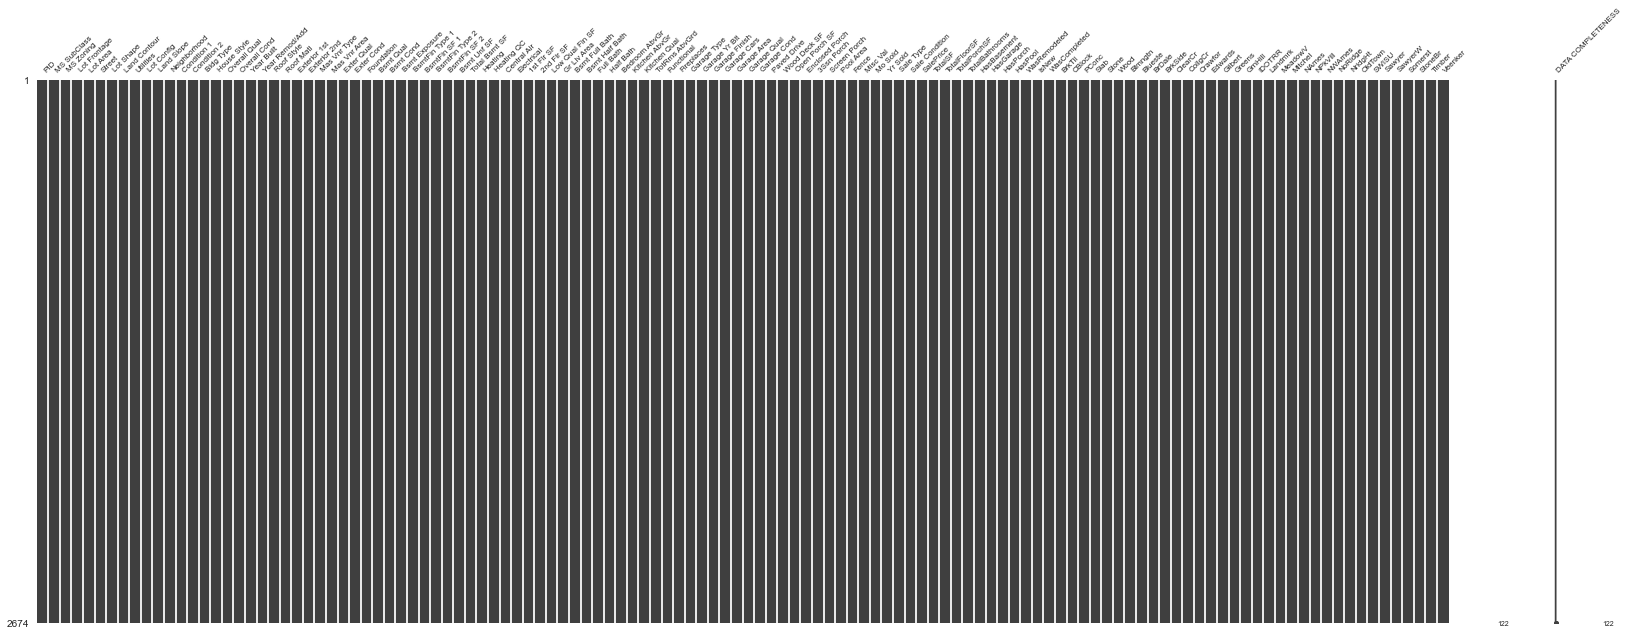

In [19]:
msno.matrix(df_ah, labels = True, fontsize = 8) #Matrix showing imputation is complete

### I chose to drop missing values that remained as my imputation method since the variables did not seem to be missing at random.  Forward or Back Fill did not seem appropriate for this imputation. Due to most of the variables being catagorical it seemed inappropriate to use a KNN imputation method as that would result in creating new dummy variables for each missing variable and their responces then imputing based on that. 

In [20]:
DF_ah = df_ah # Converting to a less wordy dataframe

In [21]:
DF_ah['Street'].unique() # Exploring other features

array(['Pave', 'Grvl'], dtype=object)

In [22]:
DF_ah['MS Zoning'].value_counts() # More exploring

RL         2108
RM          398
FV          131
RH           21
C (all)      15
I (all)       1
Name: MS Zoning, dtype: int64

In [23]:
# MS Zoning Features
dummies_type = pd.get_dummies(DF_ah['MS Zoning'], drop_first = False)
DF_ah = pd.concat([DF_ah, dummies_type], axis = 1)
DF_ah.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,BrkTil,CBlock,PConc,Slab,Stone,Wood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,C (all),FV,I (all),RH,RL,RM
0,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,No,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,MnPrv,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,No,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,MnPrv,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [24]:
# Dropping features that were used for other feature generation and those that didnt seem useful
DF_ah = DF_ah.drop(['Total Bsmt SF', 'Gr Liv Area', '1st Flr SF', '2nd Flr SF','Open Porch SF', 'Enclosed Porch', '3Ssn Porch','Screen Porch', 'Full Bath','Half Bath','Bsmt Full Bath','Bsmt Half Bath', 'Total Bsmt SF', 'Garage Area', 'TotalPorchSF','Pool Area', 'Year Remod/Add', 'Year Built', 'Sale Condition' ], axis = 1)

In [25]:
# Dropping features that were used for other feature generation and those that didnt seem useful
DF_ah = DF_ah.drop(['PID','Lot Frontage', 'MS SubClass','Utilities' ,'Land Contour', 'Condition 2','Condition 1','Exterior 1st','Exterior 2nd', 'Mas Vnr Type','Mas Vnr Area','Exter Qual','Exter Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','BsmtFin SF 1','BsmtFin SF 2','Heating','Heating QC','Electrical','Functional','Garage Type','Garage Finish','Garage Cars','Garage Qual','Garage Cond','Fence','Misc Val', 'Mo Sold','Yr Sold','Sale Type'], axis = 1)

In [26]:
# Dropping features that were used for other feature generation and those that didnt seem useful
DF_ah = DF_ah.drop(['House Style','Low Qual Fin SF','Garage Yr Blt','Kitchen Qual',  'Bsmt Cond', 'Bsmt Unf SF' ], axis = 1)

In [27]:
#Observing catagorical variables
DF_ah.info(max_cols = 122)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2674 entries, 0 to 2924
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS Zoning       2674 non-null   object 
 1   Lot Area        2674 non-null   int64  
 2   Street          2674 non-null   object 
 3   Lot Shape       2674 non-null   object 
 4   Lot Config      2674 non-null   object 
 5   Land Slope      2674 non-null   object 
 6   Neighborhood    2674 non-null   object 
 7   Bldg Type       2674 non-null   object 
 8   Overall Qual    2674 non-null   int64  
 9   Overall Cond    2674 non-null   int64  
 10  Roof Style      2674 non-null   object 
 11  Roof Matl       2674 non-null   object 
 12  Foundation      2674 non-null   object 
 13  Bsmt Qual       2674 non-null   object 
 14  Central Air     2674 non-null   object 
 15  Bedroom AbvGr   2674 non-null   int64  
 16  Kitchen AbvGr   2674 non-null   int64  
 17  TotRms AbvGrd   2674 non-null   i

In [28]:
#And encoder to convert responses in 1 - 0
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [29]:
# Encoding Central Air to Binary
#No = 0 and Yes = 1
DF_ah['Central Air'] = lc.fit_transform(DF_ah['Central Air'])

In [30]:
#Encoding Paved Drive to Binary
#No = 0 and Yes = 1
DF_ah['Paved Drive'] = (DF_ah['Paved Drive']).eq('Y').mul(1)

In [31]:
# Dummies for Bldg Type
dummies_type = pd.get_dummies(DF_ah['Bldg Type'], drop_first = True)#drop_first = False gives k dummy variables corresponding to k categories
DF_ah = pd.concat([DF_ah, dummies_type], axis = 1)
DF_ah.head()

,MS Zoning,Lot Area,Street,Lot Shape,Lot Config,Land Slope,Neighborhood,Bldg Type,Overall Qual,Overall Cond,Roof Style,Roof Matl,Foundation,Bsmt Qual,Central Air,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Paved Drive,Wood Deck SF,SalePrice,TotalSF,TotalFloorSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,BrkTil,CBlock,PConc,Slab,Stone,Wood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,C (all),FV,I (all),RH,RL,RM,2fmCon,Duplex,Twnhs,TwnhsE
0,RL,31770,Pave,IR1,Corner,Gtl,NAmes,1Fam,6,5,Hip,CompShg,CBlock,TA,1,3,1,7,2,0,210,215000,2736.0,1656,2.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,RH,11622,Pave,Reg,Inside,Gtl,NAmes,1Fam,5,6,Gable,CompShg,CBlock,TA,1,2,1,5,0,1,140,105000,1778.0,896,1.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,RL,14267,Pave,IR1,Corner,Gtl,NAmes,1Fam,6,6,Hip,CompShg,CBlock,TA,1,3,1,6,0,1,393,172000,2658.0,1329,1.5,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,RL,11160,Pave,Reg,Corner,Gtl,NAmes,1Fam,7,5,Hip,CompShg,CBlock,TA,1,3,1,8,2,1,0,244000,4220.0,2110,3.5,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,RL,13830,Pave,IR1,Inside,Gtl,Gilbert,1Fam,5,5,Gable,CompShg,PConc,Gd,1,3,1,6,1,1,212,189900,2557.0,1629,2.5,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [32]:
#Dropping after Dummies were created
DF_ah = DF_ah.drop('Bldg Type', axis = 1)

In [33]:
#New data frame
DF_ah.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2674 entries, 0 to 2924
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS Zoning       2674 non-null   object 
 1   Lot Area        2674 non-null   int64  
 2   Street          2674 non-null   object 
 3   Lot Shape       2674 non-null   object 
 4   Lot Config      2674 non-null   object 
 5   Land Slope      2674 non-null   object 
 6   Neighborhood    2674 non-null   object 
 7   Overall Qual    2674 non-null   int64  
 8   Overall Cond    2674 non-null   int64  
 9   Roof Style      2674 non-null   object 
 10  Roof Matl       2674 non-null   object 
 11  Foundation      2674 non-null   object 
 12  Bsmt Qual       2674 non-null   object 
 13  Central Air     2674 non-null   int32  
 14  Bedroom AbvGr   2674 non-null   int64  
 15  Kitchen AbvGr   2674 non-null   int64  
 16  TotRms AbvGrd   2674 non-null   int64  
 17  Fireplaces      2674 non-null   i

In [34]:
#Dropping more variables that seem to have low relavance and MS Zoning which we created Dummies for
DF_ah = DF_ah.drop(['MS Zoning','Street','Lot Shape','Lot Config','Land Slope','Neighborhood','Roof Style','Roof Matl','Foundation','Bsmt Qual'], axis = 1)

In [35]:
#New info
DF_ah.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2674 entries, 0 to 2924
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2674 non-null   int64  
 1   Overall Qual    2674 non-null   int64  
 2   Overall Cond    2674 non-null   int64  
 3   Central Air     2674 non-null   int32  
 4   Bedroom AbvGr   2674 non-null   int64  
 5   Kitchen AbvGr   2674 non-null   int64  
 6   TotRms AbvGrd   2674 non-null   int64  
 7   Fireplaces      2674 non-null   int64  
 8   Paved Drive     2674 non-null   int32  
 9   Wood Deck SF    2674 non-null   int64  
 10  SalePrice       2674 non-null   int64  
 11  TotalSF         2674 non-null   float64
 12  TotalFloorSF    2674 non-null   int64  
 13  TotalBathrooms  2674 non-null   float64
 14  HasBasement     2674 non-null   int64  
 15  HasGarage       2674 non-null   int64  
 16  HasPorch        2674 non-null   int64  
 17  HasPool         2674 non-null   i

## Impute the data

1) Check whether each of the variables have missing values - Evaluated with MSNO Matrix

2) Impute the missing values using appropriate method and explain why you use that method? - Filled and Explained Above

3) Look at the data and for remaining categorical variable, create the dummy variable, or drop the variable. Explain your reasoning. - Remaining Single?? There seem to be multiple remaining catagorical Variables. Since the defininition of Catagorical is a limited number of responses I will seek one not used in the generation of our other new features. 

    I opted to convert multip


## Split the data into training and test set with training on 80 percent
* you may use the following code 

X = DF_AH.drop('SalePrice', axis = 1) #keep features only for X
y = DF_AH['SalePrice'] #keep target variable only for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
#Create the train test split you can set the parameters to you liking
X = DF_ah.drop('SalePrice', axis = 1) #keep features only for X
y = DF_ah['SalePrice'] #keep target variable only for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
# Manually Converts the Uint8 variables to numeric for regression analysis
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
X_train_sc = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_test_sc = scaler.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [40]:
# New info
DF_ah.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2674 entries, 0 to 2924
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2674 non-null   int64  
 1   Overall Qual    2674 non-null   int64  
 2   Overall Cond    2674 non-null   int64  
 3   Central Air     2674 non-null   int32  
 4   Bedroom AbvGr   2674 non-null   int64  
 5   Kitchen AbvGr   2674 non-null   int64  
 6   TotRms AbvGrd   2674 non-null   int64  
 7   Fireplaces      2674 non-null   int64  
 8   Paved Drive     2674 non-null   int32  
 9   Wood Deck SF    2674 non-null   int64  
 10  SalePrice       2674 non-null   int64  
 11  TotalSF         2674 non-null   float64
 12  TotalFloorSF    2674 non-null   int64  
 13  TotalBathrooms  2674 non-null   float64
 14  HasBasement     2674 non-null   int64  
 15  HasGarage       2674 non-null   int64  
 16  HasPorch        2674 non-null   int64  
 17  HasPool         2674 non-null   i

In [41]:
# Ensuring proper libraries are loaded 
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [42]:
X_trainlm = sm.add_constant(X_train).copy()

lr_1 = sm.OLS(y_train, X_trainlm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     259.8
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:47:24   Log-Likelihood:                -24888.
No. Observations:                2139   AIC:                         4.989e+04
Df Residuals:                    2081   BIC:                         5.022e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Lot Area           0.7774      0.107      7.279      0.000       0.568       0.987
Overall Qual    1.305e+04    842.043     15.503      0.000    1.14e+04    1.47e+04
Overall Cond    6650.4866    680.337      9.775      0.000    5316.274    7984.700
Central Air     3746.9099   3355.627      1.117      0.264   -2833.826    1.03e+04
Bedroom AbvGr  -8960.1478   1194.564     -7.501      0.000   -1.13e+04   -6617.483
Kitchen AbvGr  -2.936e+04   6194.592     -4.739      0.000   -4.15e+04   -1.72e+04
TotRms AbvGrd    833.0117    839.583      0.992      0.321    -813.499    2479.523
Fireplaces      4050.8263   1154.429      3.509      0.000    1786.871    6314.782
Paved Drive     4908.5816   2663.826      1.843      0.066    -315.459    1.01e+04
Wood Deck SF      16.9560      5.140      3.299      0.001       6.876      27.036
TotalSF           35.9940      2.191     16.425      0.000      31.696      40.292
TotalFloorSF      15.4135      3.807      4.049      0.000       7.948      22.879
TotalBathrooms  1.169e+04   1155.497     10.119      0.000    9426.623     1.4e+04
HasBasement    -7386.6422   4430.018     -1.667      0.096   -1.61e+04    1301.087
HasGarage      -7386.6422   4430.018     -1.667      0.096   -1.61e+04    1301.087
HasPorch       -1244.3402   1522.234     -0.817      0.414   -4229.601    1740.921
HasPool         2.383e+04   8947.521      2.663      0.008    6278.849    4.14e+04
WasRemodeled    -352.2823   1453.923     -0.242      0.809   -3203.577    2499.012
IsNew           1.098e+04   2473.042      4.439      0.000    6127.350    1.58e+04
WasCompleted   -1.462e+04   2605.227     -5.610      0.000   -1.97e+04   -9507.428
BrkTil         -9518.4533   3717.474     -2.560      0.011   -1.68e+04   -2228.099
CBlock         -3321.1491   3481.615     -0.954      0.340   -1.01e+04    3506.663
PConc           2827.4644   3546.152      0.797      0.425   -4126.910    9781.839
Slab           -3.002e-11      2e-11     -1.504      0.133   -6.92e-11    9.12e-12
Stone            880.6058   8488.069      0.104      0.917   -1.58e+04    1.75e+04
Wood            1744.8899   1.17e+04      0.149      0.881   -2.12e+04    2.47e+04
Blmngtn        -1.201e+04   6503.237     -1.847      0.065   -2.48e+04     743.585
Blueste         3029.5514   9618.189      0.315      0.753   -1.58e+04    2.19e+04
BrDale          3293.7929   6841.097      0.481      0.630   -1.01e+04    1.67e+04
BrkSide         -2.15e+04   4349.004     -4.943      0.000      -3e+04    -1.3e+04
ClearCr        -1.713e+04   5297.744     -3.233      0.001   -2.75e+04   -6737.407
CollgCr        -1.114e+04   2926.024     -3.807      0.000   -1.69e+04   -5400.761
Crawfor         2585.5629   3634.665      0.711      0.477   -4542.396    9713.522
Edwards        -2.103e+04   3239.417     -6.491      0.000   -2.74e+04   -1.47e+04
Gilbert     

In [43]:
X_trainlm2 = X_train.copy()
X_trainlm2.drop(['Central Air','Somerst','Wood','Stone','Slab','PConc','I (all)','NPkVill','Crawfor','Crawfor','Landmrk','RL','C (all)','RM','HasGarage','Blueste','FV','BrDale','WasRemodeled','RH','MeadowV','Greens','2fmCon','Duplex','Veenker','Timber','TotRms AbvGrd','Paved Drive','HasPool','Blmngtn'], axis = 1)


lr_2 = sm.OLS(y_train, X_trainlm2).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     259.8
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:47:24   Log-Likelihood:                -24888.
No. Observations:                2139   AIC:                         4.989e+04
Df Residuals:                    2081   BIC:                         5.022e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Lot Area           0.7774      0.107      7.279      0.000       0.568       0.987
Overall Qual    1.305e+04    842.043     15.503      0.000    1.14e+04    1.47e+04
Overall Cond    6650.4866    680.337      9.775      0.000    5316.274    7984.700
Central Air     3746.9099   3355.627      1.117      0.264   -2833.826    1.03e+04
Bedroom AbvGr  -8960.1478   1194.564     -7.501      0.000   -1.13e+04   -6617.483
Kitchen AbvGr  -2.936e+04   6194.592     -4.739      0.000   -4.15e+04   -1.72e+04
TotRms AbvGrd    833.0117    839.583      0.992      0.321    -813.499    2479.523
Fireplaces      4050.8263   1154.429      3.509      0.000    1786.871    6314.782
Paved Drive     4908.5816   2663.826      1.843      0.066    -315.459    1.01e+04
Wood Deck SF      16.9560      5.140      3.299      0.001       6.876      27.036
TotalSF           35.9940      2.191     16.425      0.000      31.696      40.292
TotalFloorSF      15.4135      3.807      4.049      0.000       7.948      22.879
TotalBathrooms  1.169e+04   1155.497     10.119      0.000    9426.623     1.4e+04
HasBasement    -7386.6422   4430.018     -1.667      0.096   -1.61e+04    1301.087
HasGarage      -7386.6422   4430.018     -1.667      0.096   -1.61e+04    1301.087
HasPorch       -1244.3402   1522.234     -0.817      0.414   -4229.601    1740.921
HasPool         2.383e+04   8947.521      2.663      0.008    6278.849    4.14e+04
WasRemodeled    -352.2823   1453.923     -0.242      0.809   -3203.577    2499.012
IsNew           1.098e+04   2473.042      4.439      0.000    6127.350    1.58e+04
WasCompleted   -1.462e+04   2605.227     -5.610      0.000   -1.97e+04   -9507.428
BrkTil         -9518.4533   3717.474     -2.560      0.011   -1.68e+04   -2228.099
CBlock         -3321.1491   3481.615     -0.954      0.340   -1.01e+04    3506.663
PConc           2827.4644   3546.152      0.797      0.425   -4126.910    9781.839
Slab           -3.002e-11      2e-11     -1.504      0.133   -6.92e-11    9.12e-12
Stone            880.6058   8488.069      0.104      0.917   -1.58e+04    1.75e+04
Wood            1744.8899   1.17e+04      0.149      0.881   -2.12e+04    2.47e+04
Blmngtn        -1.201e+04   6503.237     -1.847      0.065   -2.48e+04     743.585
Blueste         3029.5514   9618.189      0.315      0.753   -1.58e+04    2.19e+04
BrDale          3293.7929   6841.097      0.481      0.630   -1.01e+04    1.67e+04
BrkSide         -2.15e+04   4349.004     -4.943      0.000      -3e+04    -1.3e+04
ClearCr        -1.713e+04   5297.744     -3.233      0.001   -2.75e+04   -6737.407
CollgCr        -1.114e+04   2926.024     -3.807      0.000   -1.69e+04   -5400.761
Crawfor         2585.5629   3634.665      0.711      0.477   -4542.396    9713.522
Edwards        -2.103e+04   3239.417     -6.491      0.000   -2.74e+04   -1.47e+04
Gilbert     

In [44]:
X_test_lm = X_test.copy()
X_testlm = X_test.drop(['OldTown','NoRidge','NAmes','IDOTRR','Edwards','Mitchel','Gilbert','BrkTil','Sawyer','SawyerW','BrkSide','CBlock','CollgCr','ClearCr','GrnHill','IsNew','HasPorch','TotalFloorSF','Wood Deck SF','Lot Area','Central Air','Somerst','Wood','Stone','Slab','PConc','I (all)','NPkVill','Crawfor','Crawfor','Landmrk','RL','C (all)','RM','HasGarage','Blueste','FV','BrDale','WasRemodeled','RH','MeadowV','Greens','2fmCon','Duplex','Veenker','Timber','TotRms AbvGrd','Paved Drive','HasPool','Blmngtn'], axis = 1)


lr_test = sm.OLS(y_test, X_testlm).fit()
pred = lr_test.predict(X_testlm) 

lr_test.summary2(float_format=".2f")

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                 OLS                 Adj. R-squared:        0.889     
Dependent Variable:    SalePrice           AIC:                   12416.4998
Date:                  2021-10-21 15:47    BIC:                   12480.7338
No. Observations:      535                 Log-Likelihood:        -6193.2   
Df Model:              14                  F-statistic:           307.5     
Df Residuals:          520                 Prob (F-statistic):    6.42e-241 
R-squared:             0.892               Scale:                 6.8361e+08
----------------------------------------------------------------------------
                  Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------
Overall Qual    17752.7393  1323.8504 13.4099 0.0000  15151.9869  20353.4917
Overall Cond     6018.4811  1145.2734  5.2551 0.0000   3768.5497   8268.4125
Bedroom AbvGr   -8118.0815  1716.7168 -4.7288 0.0000 -11490.6343  -4745.5287
Kitchen AbvGr  -40000.9226  8029.1100 -4.9820 0.0000 -55774.4022 -24227.4429
Fireplaces      11546.0627  2175.9233  5.3063 0.0000   7271.3819  15820.7435
TotalSF            52.9520     2.6396 20.0609 0.0000     47.7664     58.1375
TotalBathrooms  16572.6516  1907.8261  8.6867 0.0000  12824.6575  20320.6457
HasBasement    -57064.6042 13885.8170 -4.1096 0.0000 -84343.7986 -29785.4098
WasCompleted   -19866.3251  4277.0061 -4.6449 0.0000 -28268.6597 -11463.9905
NWAmes         -20179.3250  5228.6328 -3.8594 0.0001 -30451.1651  -9907.4849
NridgHt         40301.1585  5353.6884  7.5277 0.0000  29783.6422  50818.6748
SWISU          -44543.9085 13347.7443 -3.3372 0.0009 -70766.0394 -18321.7777
StoneBr         42849.9607  8489.2055  5.0476 0.0000  26172.6067  59527.3147
Twnhs          -21036.9359  7257.5299 -2.8986 0.0039 -35294.6184  -6779.2535
TwnhsE         -24313.8486  4842.7311 -5.0207 0.0000 -33827.5707 -14800.1265
----------------------------------------------------------------------------
Omnibus:                 107.100          Durbin-Watson:             1.856  
Prob(Omnibus):           0.000            Jarque-Bera (JB):          546.139
Skew:                    0.772            Prob(JB):                  0.000  
Kurtosis:                7.703            Condition No.:             36119  
============================================================================
* The condition number is large (4e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [45]:
r2_score(y_test, pred)

0.8922428610370127

In [46]:
mean_absolute_percentage_error(y_test, pred)*100

11.049525165744043

###### Regression Equation - y = 17752.7393x1 + 6018.4811x2 + (-8118.0815x3) + (-40000.9226x4) + 11546.0627x5 + 52.9520x6 + 16572.6516x7 + (-57064.6042x8) + (-19866.3251x9) + (-20179.3250x10) + 40301.1585x11 + (-44543.9085x12) + 42849.9607x13 + (-21036.9359x14) + (-24313.8486x15)

In [47]:
# The following code is used to calculate the MSE RMSE MAE AND RMSPE

test_mse = sm.tools.eval_measures.mse(y_test, pred, axis=0)
test_rmse= sm.tools.eval_measures.rmse(y_test, pred, axis=0)
test_mae= sm.tools.eval_measures.meanabs(y_test, pred, axis=0)
test_rmspe= sm.tools.eval_measures.rmspe(y_test, pred, axis=0)

print(f' the train MSE is:{test_mse}')
print(f' the train RMSE is:{test_rmse}')
print(f' the train MAE is:{test_mae}')
print(f' the train RMSPE is:{test_rmspe}')

 the train MSE is:664442538.219208
 the train RMSE is:25776.782929978053
 the train MAE is:18641.03582966745
 the train RMSPE is:1.5664737988030282


### Since we have a MAPE of about 10.87% we have an 89% accuracy which correlates with our R2 value .881
### We also have a RMSE of 26865.48 which since the houses we are calculating the values on are in the upper hundred thousands is an acceptable error margin.

## Build the Multiple Regression Model

(a)  Build a multiple regression model using backwards elimination. To do this follow the following steps:

(1) Build initial model -Built

(2) Review p-values

    - if a p-value is > 0.05 then eliminate the highest p-value and go to step 3
    - **if all p-values are less than 0.05 then your model is complete**
    
(3) Build a new model without eliminated independent variable - Built

(4) Go back to step 2

(b) Write the regression equation where Saleprice is a dependent(target) variable and all the statistically significant predictors as independent variable. 

(5) As we used the validation set approach here, predict the y values in the test data and report the following measures of accuracy.

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
Please interpret these values.

## Build the LASSO Regression Model

(a)  Build a LASSO regression model using all the variables that you used initially in your multiple linear regression model. Please report the following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values?

(b) Identify the variables with the non zero regression coefficients. Are they the same as the one that is statistically insignificant in multiple linear regression model?

    - Some of the variables shown to have low signifigance in the Multiple Linear Model have High signifigance in the LASSO Model.


(c) Write the regression equation where Saleprice is a dependent(target) variable and all the statistically significant predictors as independent variable.

In [48]:
from sklearn.linear_model import Lasso


In [49]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler


In [51]:
# MAPE and Accuracy Calculation

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

lasso_model = Lasso(alpha=.5)
lasso=lasso_model.fit(X_train , y_train)
lasso_predict = lasso.predict(X_test)
lasso_MAPE = MAPE(y_test,lasso_predict)
print("Lasso MAPE value: ",lasso_MAPE)
Accuracy = 100 - lasso_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracy))

Lasso MAPE value:  9.881839724910796
Accuracy of Lasso Regression: 90.12%.


iteration 10 done
iteration 15 done
iteration 20 done
iteration 25 done
iteration 30 done
iteration 35 done


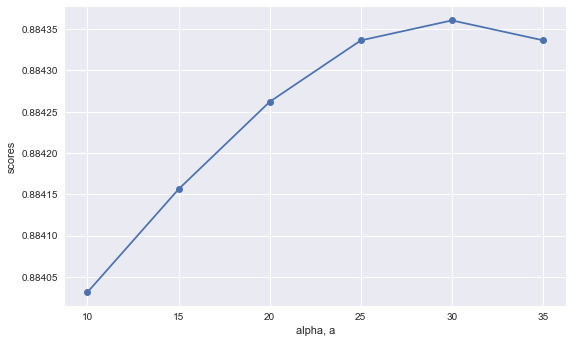

In [52]:
alphas = [10, 15, 20, 25, 30, 35] # here alpha is the lambda in the lecture note, the coefficient of lasso penalty
scores = []

for a in alphas:
    lasso = Lasso(alpha = a, normalize = False) # I choose normalize = False here
    lasso.fit(X_train, y_train)
    #yhat_test=lasso.predict(X_test)
    #scores.append(mean_squared_error(y_test, yhat_test))
    scores.append(lasso.score(X_test, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [53]:

# Set lasso regression parameters
lasso_reg = Lasso(alpha=30, fit_intercept=False, normalize=True, max_iter=5000)

# Create line on regression data and show fit
lasso_reg.fit(sm.add_constant(X),y)

# Create predictions and store in a list
lasso_pred = lasso_reg.predict(sm.add_constant(X))



# Store regression coefficients for features for comparison
reg_coeff = pd.DataFrame()
reg_coeff["Feature"] = sm.add_constant(X).columns
reg_coeff["Lasso Coefficient"] = np.transpose(lasso_reg.coef_)
reg_coeff.round(4)

,Feature,Lasso Coefficient
0,Lot Area,0.4957
1,Overall Qual,13841.5970
2,Overall Cond,6385.4073
3,Central Air,629.5793
4,Bedroom AbvGr,-10006.1589
5,Kitchen AbvGr,-33580.9972
6,TotRms AbvGrd,1660.4450
7,Fireplaces,5073.2348
8,Paved Drive,3479.2638
9,Wood Deck SF,15.8374


In [54]:
reg_coeff[reg_coeff['Lasso Coefficient']!=0].round(4)


,Feature,Lasso Coefficient
0,Lot Area,0.4957
1,Overall Qual,13841.5970
2,Overall Cond,6385.4073
3,Central Air,629.5793
4,Bedroom AbvGr,-10006.1589
5,Kitchen AbvGr,-33580.9972
6,TotRms AbvGrd,1660.4450
7,Fireplaces,5073.2348
8,Paved Drive,3479.2638
9,Wood Deck SF,15.8374


In [55]:
# RMSE and R-Squared Calculation

train_rmse= sm.tools.eval_measures.rmse(y, lasso_pred, axis=0)



print("The Lasso train RMSE is: ", train_rmse)
rsl = lasso.score(X_test, y_test)
print("The r2 value for the Lasso Regression is: ",rsl)

The Lasso train RMSE is:  27210.02226867797
The r2 value for the Lasso Regression is:  0.8843365180685805


## LASSO LINEAR MODEL
##### y = 0.4957x1  +  13841.5970x2  +  6385.4073x3  +  629.5793x4  +  -10006.1589x5  +  -33580.9972x6 + 1660.4450x7 + 5073.2348x8 + 3479.2638x9 + 15.8374x10 + 39.4544x11 + 12.2461x12 + 12037.2530x13 + -25895.2547x14 + -0.0000x15 + -3002.3160x16 + 14038.8198x17 + -506.3957x18 + 10375.6480x19 + -14926.7314x20 + -9047.7850x21 + -2268.1455x22 + 2611.6490x23 + -3186.7488x24 + 1205.6038x25 + 5050.7352x26 + -7683.5232x27 + -2258.7713x28 + -425.2846x29 + 10693.5451x30 + -9484.3894x31 + -7546.8055x32 + 9644.3991x33 + 37879.3641x34 + -14983.7983x35 + 11241.3507x36 + -865.5427x37 + -7167.5401x38 + 1705.9019x39 + -14671.1761x40 + 35476.8089x41 + 42489.4075x42 + -17177.9763x43 + -18694.4915x44 + -1015.9784x45 + -3988.1349x46 + 8578.2827x47 + 52369.1649x48 + 4161.0726x49 + -3017.4050x50 + -2715.5284x51 + -31734.5841x52 + 24451.2917x53

## Build the Ridge Regression Model

(a) Perform the 10 fold crossvalidation using the training data to estimate the best value of the parameter lambda for the Ridge regression model. For this you may use the function RidgeCV and the scoring measure r2_score. Please find the link for the documentation of RidgeCV below.  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

(b)  Build the Ridge regression model using all the variables that you used initially in your multiple linear regression model together with the best lambda obtained in part (a).  
Please report the scores of following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values?

(c) Identify the regression coefficients of all variables. What is the difference you noticed between the Lasso and the Ridge regression coefficients?

(d) Write the regression equation with Saleprice as a dependent(target) variable and all the predictors as independent variable. Note: Since the value of coefficient may be very small, you may round the coefficient to two decimal places and use the non zero coefficients.
 

iteration 1e-06 done
iteration 1e-05 done
iteration 0.0001 done
iteration 0.0005 done
iteration 0.001 done
iteration 0.01 done
iteration 0.1 done
iteration 0.5 done
iteration 1 done
iteration 5 done
iteration 7 done
iteration 10 done
iteration 15 done


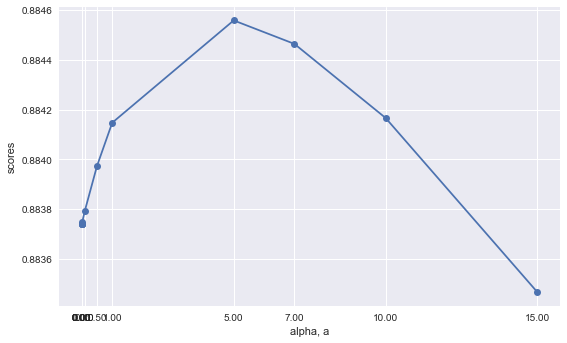

In [56]:
alphas = [0.000001, 0.00001, 0.0001, 0.0005, 0.001, 0.01, 0.1, 0.5, 1, 5, 7, 10, 15] #alpha values do not stop at 1, they can go to +infinity, but normally are under 50
scores = []

for a in alphas:
    ridge = Ridge(alpha = a, normalize = False) # Normalization True or False  will give different value of alpha 
    ridge.fit(X_train, y_train)
    scores.append(ridge.score(X_test, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [57]:
# Set ridge regression parameters
ridge_reg = Ridge(alpha=5, fit_intercept=False, normalize=True)

# Create line on regression data and show fit
ridge_reg.fit(sm.add_constant(X), y)

# Create predictions and store in a list
ridge_pred = ridge_reg.predict(sm.add_constant(X))

# Save full-featured (ridge) set of regression coefficients
reg_coeff["Ridge Coefficient"] = np.transpose(ridge_reg.coef_)
reg_coeff.round(2)

,Feature,Lasso Coefficient,Ridge Coefficient
0,Lot Area,0.50,0.52
1,Overall Qual,13841.60,13860.37
2,Overall Cond,6385.41,6408.20
3,Central Air,629.58,1369.81
4,Bedroom AbvGr,-10006.16,-10072.17
5,Kitchen AbvGr,-33581.00,-28287.57
6,TotRms AbvGrd,1660.45,1716.80
7,Fireplaces,5073.23,4989.08
8,Paved Drive,3479.26,4096.75
9,Wood Deck SF,15.84,15.83


In [58]:
# MAPE and Accuracy Calculation

ridge_model = Ridge(alpha=.5)
ridge=ridge_model.fit(X_train , y_train)
ridge_predict = ridge.predict(X_test)
ridge_MAPE = MAPE(y_test,ridge_predict)
print("MAPE value: ",ridge_MAPE)
Accuracy = 100 - ridge_MAPE
print('Accuracy of Ridge Regression: {:0.2f}%.'.format(Accuracy))

MAPE value:  9.874754674355996
Accuracy of Ridge Regression: 90.13%.


In [59]:
# RMSE and R-Squared Calculation
train_rmse= sm.tools.eval_measures.rmse(y, ridge_pred, axis=0)



print(f' the train RMSE is:{train_rmse}')
rsr = ridge.score(X_test, y_test)
print("The r2 value for the Ridge Regression is: ",rsr)



 the train RMSE is:27211.31429424719
The r2 value for the Ridge Regression is:  0.8839738137053066


# The Ridge Linear Equation is:
#### y =0.52x1 + 13860.37x2 + 6408.20x3 + 1369.81x4 + -10072.17x5 + -28287.57x6 + 1716.80x7 + 4989.08x8 + 4096.75x9 + 15.83x10 + 39.91x11 + 11.68x12 + 12100.08x13 + -13425.77x14 + -13425.77x15 + -3307.33x16 + 14585.92x16 + -650.84x17 + 10846.18x18 + -14866.54x19 + -10422.26x20 + -3893.70x21 + 2102.48x22 + -599.42x23 + -612.86x24 + -10506.35x25 + 4608.87x26 + 4965.55x27 + -11189.91x28 + -8478.33x29 + -6544.96x30 + 6424.98x31 + -14169.92x32 + -13512.61x33 + 9439.48x34 + 18919.62x35 + -16607.82x36 + 2933.04x37 + 9931.89x38 + -6436.32x39 + -12001.07x40 + 617.49x41 + -19557.08x42 + 28587.49x43 + 35345.91x44 + -20029.00x45 + -22305.72x46 + -6041.92x47 + -9918.20x48 + 1993.43x49 + 43266.09x50 + -682.71x51 + -2477.69x52 + -4337.36x53 + 899.08x54 + -3936.96x55 + -673.06x56 + -3161.72x57 + -2215.75x58 + -5880.60x59 + -5334.28x60 + -32462.29x61 + -24155.65x62

# Below you will see the Summary INCLUDING the constant for the Linear equation for both the LASSO and RIDGE Models

In [60]:

reg_coeff.round(4)

,Feature,Lasso Coefficient,Ridge Coefficient
0,Lot Area,0.4957,0.5158
1,Overall Qual,13841.5970,13860.3689
2,Overall Cond,6385.4073,6408.1959
3,Central Air,629.5793,1369.8087
4,Bedroom AbvGr,-10006.1589,-10072.1689
5,Kitchen AbvGr,-33580.9972,-28287.5728
6,TotRms AbvGrd,1660.4450,1716.8018
7,Fireplaces,5073.2348,4989.0780
8,Paved Drive,3479.2638,4096.7469
9,Wood Deck SF,15.8374,15.8315


In [61]:
r_train_rmse= sm.tools.eval_measures.rmse(y, ridge_pred, axis=0)
l_train_rmse= sm.tools.eval_measures.rmse(y, lasso_pred, axis=0)

print("The r2 value for the Lasso Regression is: ",rsl)
print('The Lasso train RMSE is: ',l_train_rmse )
print("Lasso MAPE value: ",lasso_MAPE)
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracy))

print("The r2 value for the Ridge Regression is: ",rsr)
print('The Ridge train RMSE is: ', r_train_rmse)
print("Ridge MAPE value: ",ridge_MAPE)
Accuracy = 100 - ridge_MAPE
print('Accuracy of Ridge Regression: {:0.2f}%.'.format(Accuracy))

The r2 value for the Lasso Regression is:  0.8843365180685805
The Lasso train RMSE is:  27210.02226867797
Lasso MAPE value:  9.881839724910796
Accuracy of Lasso Regression: 90.13%.
The r2 value for the Ridge Regression is:  0.8839738137053066
The Ridge train RMSE is:  27211.31429424719
Ridge MAPE value:  9.874754674355996
Accuracy of Ridge Regression: 90.13%.


# Mid-Term Summary
## The RIDGE counted each value as significant whereas the LASSO Regression did not. 
## The LASSO Model Seemed to be our best Predictive model by a slim margin. 
## The Multiple Linear Model had values of RMSE: 25776.78    R2: 89.22   MAPE: 11.05
## The LASSO Model had values of RMSE: 27210.02    R2: 88.43   MAPE: 9.88
## The RIDGE Model had values of RMSE:  27211.31   R2: 88.40  MAPE: 9.87

# We find that for the best model we built we can explain 88.43% of the Variance and be able to make predictions with an accuracy of 90.13%. The observation should fall within around 27,210.02dollars of the actual sale price of the house.